# Percentils, Bootstrapping and Confidence Intervals

This notebook reviews Lecture 23: Confidence Intervals and Lecture 24: Interpreting Confidence. 

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
- [Percentiles](https://inferentialthinking.com/chapters/13/1/Percentiles.html)
- [Bootstrap](https://inferentialthinking.com/chapters/13/2/Bootstrap.html)
- [Confidence Intervals](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html)

In [2]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from math import ceil

### Percentiles

Use the student data to identify the 20th, 40th, 60th, and 80th quartile of the height. Calculate your answers in two ways: once using the `percentile` function provided by the `datascience` package, and a second time by using the definition of percentiles. The position $L$ in a sorted list for the k-th percentile is given by: 

$L = \frac{k}{100} * n$

If L is not an integer, you can use the `ceil` function in the `math` package to round $L$ up to the next greater integer. 

In [3]:
students = Table.read_table('student_data.csv')
hgt = students.column('HEIGHT')
hgt.sort()


The `boxplot` shows some of the important percentiles from a given set of data. Run the following code to examine the boxplot of the student height data. How do your percentiles compare with these? 

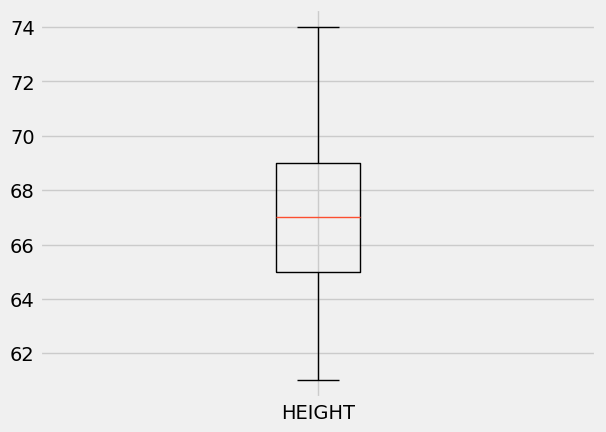

In [3]:
students.select('HEIGHT').boxplot()

### Bootstrapping

Prices of 10 textbooks are shown below. 

In [5]:
ten_books = make_array(35, 83, 102, 58, 91, 155, 205, 220, 120, 67, 99)

Find the sample mean. 

Use `sample` to create a bootstrap sample. Does your sample contain any repeated values? Is this a problem? 

Find the mean of this bootstrap sample. 

If we generate many means from all the bootstrap samples, where will this bootstrap distribution be centered?  

### Confidence Intervals from Previous Simulations

What percentage of Americans believe in global warming?  A survey on 2,251 randomly selected individuals conducted in October 2020 found that 1,328 answered Yes to the question “Is there solid evidence of global warming?”   A bootstrap distribution for this data is shown.  

<img src="bootstrap_proportion.png" width=600>

What does each value represent in this graph? 

Use the information in the graph to give and interpret a 95% CI for the proportion of Americans who believe there is solid evidence of global warming. (Note: you can use the closest values on the X-axis to approximate the middle 95% of the total area) 

A survey of 50 four-year colleges in the U.S. shows their tuition in 2020. Based on this sample, bootstrapping was used to resample from the 50 colleges and the distribution of the bootstrap sample means is shown below. 
<img src="bootstrap_mean.GIF" width=800>

Use this graph to derive the 95% confidence interval of the mean tuition cost in U.S. 4-year colleges. 

### Constructing a Confidence Interval for a Single Mean

The following code uses the student data to create a bootstrap confidence interval for the average age. In the usage of ```table.sample```, is it doing sampling with or without replacement?  What would happen otherwise?   

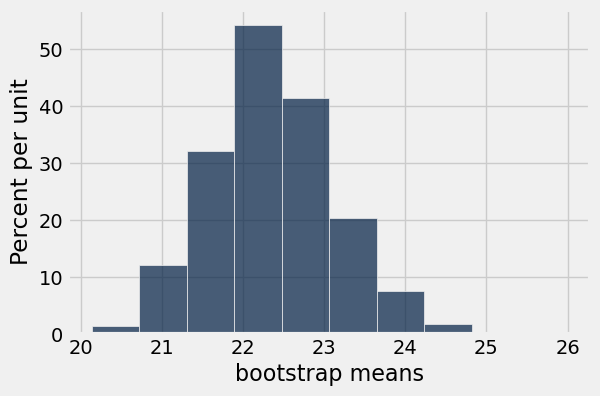

In [18]:
bootstrap_means = make_array()
for i in np.arange(5000):
    resampled_mean = np.average(students.sample().column('AGE'))
    bootstrap_means = np.append(bootstrap_means, resampled_mean)

Table().with_column('bootstrap means', bootstrap_means).hist()

Use the `bootstrap_means` array and `percentile` function to compute the 90%, 95% and 99% confidence intervals for the average age. 

In [ ]:
# you can draw the interval on the histogram by using plots.plot([left, right], [0, 0], color='red', lw=8);
# 90% confidence interval


# 95% C.I.


# 99% C.I.


### Confidence Interval for a Difference of Two Means

Can you modify the simulation above to use bootstrapping to construct a confidence interval between the average height of male and female students? (Note: you can use ```average_male - average_female``` as the bootstrap statistic)

Using the NBA data to construct a 95% confidence interval for the average salary of players in 2020 and compare it with the 2010 season.  

In [13]:
nba = Table.read_table('nba_salaries.csv')
nba20 = nba.where('season', are.equal_to(2020))
nba10 = nba.where('season', are.equal_to(2010))

In [14]:
def average_salary_bootstrap(table):
    bootstrap_means = make_array()
    for i in np.arange(5000):
        resampled_mean = np.average(table.sample().column('salary'))
        bootstrap_means = np.append(bootstrap_means, resampled_mean)
    return bootstrap_means

means20 = average_salary_bootstrap(nba20)
means10 = average_salary_bootstrap(nba10)

Use the NBA data, can you find how many percent of all the players play the Center (C) position in 2020 v.s. 2010?

### Confidence Interval for Proportions 

The sample proportions can be seen as the mean of a binary variable, where $X=1$ represents the heads of a coin toss, and $X=0$ otherwise. This variable is automatically created when you use ```np.count_nonzero```. For example, to construct a confidence interval for the proportion of students who use social media, we use the following code to generate the bootstrap distribution. 

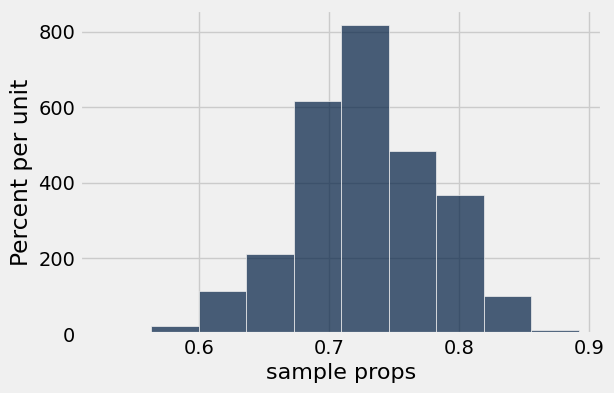

In [11]:
bootstrap_props = make_array()
for i in np.arange(5000):
    resampled_prop = np.count_nonzero(students.sample().column('SOCIAL') == 'Yes') / students.num_rows
    bootstrap_props = np.append(bootstrap_props, resampled_prop)
Table().with_column('sample props', bootstrap_props).hist()

In [12]:
percentile(2.5, bootstrap_props), percentile(97.5, bootstrap_props)

(0.6216216216216216, 0.82432432432432434)

Use the NBA data to produce 95% confidence intervals for the proportion of centers in 2020 v.s. 2010.

In [58]:
def prop_center_bootstrap(table):
    bootstrap_props = make_array()
    for i in np.arange(5000):
        resampled_prop = np.count_nonzero(table.sample().column('position') == 'C') / table.num_rows
        bootstrap_props = np.append(bootstrap_props, resampled_prop)
    return bootstrap_props


Based on these confidence intervals, is there an evidence that the percentage of centers in NBA changed significantly from 2010 to 2020? 